<a href="https://colab.research.google.com/github/YoohyeonRoh/Quest_YH/blob/main/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5(%EB%B6%84%EB%A5%98)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 의사결정나무
- 지도학습 알고리즘(분류, 회귀)
- 직관적인 알고리즘(이해 쉬움)
- 과대적합되기 쉬운 알고리즘(트리 깊이 제한 필요)
- 정보이득(Imfomation gain)이 최대가 되는 특성을 나누는 기준(불순도를 측정하는 기준)은 '지니'와 '엔트로피'가 사용됨
- 데이터가 한 종류만 있다면 엔트로피/지니 불순도는 0에 가까움, 서로 다른 데이터의 비율이 비슷하면 1에 가까움
- 정보이득(Imfomation gain)이 최대(1-불순도)
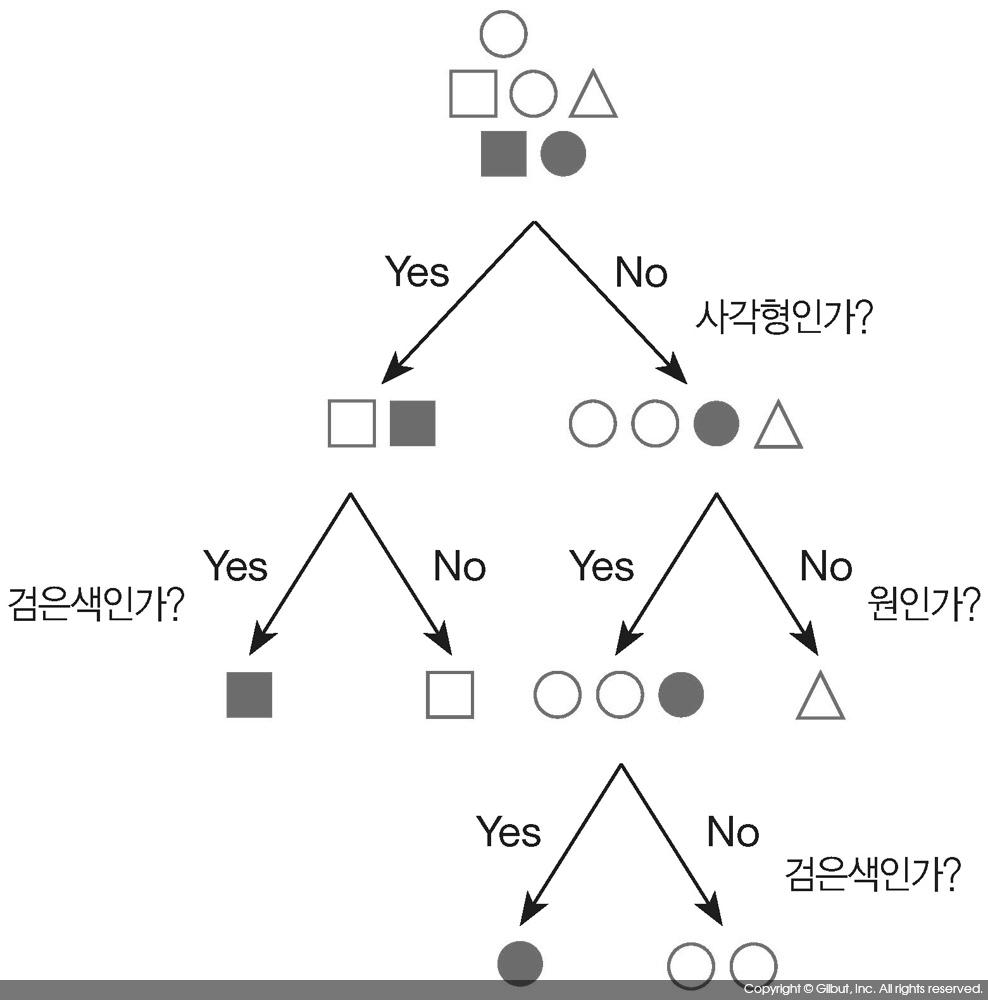


In [ ]:
# 05. 지도학습 분류
  # - 분류모델활용, 하이퍼파라미터 튜닝
# 1. 의사결정나무: 정확도 약 92%
# 2. 랜덤포레스트: 정확도 약 94%
# 3. XGboost: 정확도 


# 3. XGboost
#  1) extreme Gradient Boosting(익스트림 그레이던트 부스팅)
#  2) 부스팅(앙상블) 기반의 알고리즘
#  3) 트리 앙상블 중 성능이 좋은 알고리즘
#  4) 캐글(글로벌 AI 경진대회) 뛰어난 성능을 보이면서 인기가 높아
 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

def make_dataset():
    bc = load_breast_cancer()
    df = pd.DataFrame(bc.data, columns=bc.feature_names)
    df['target'] = bc.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.5, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((284, 30), (285, 30), (284,), (285,))

In [ ]:
# XGboost
from xgboost import XGBClassifier
model=XGBClassifier(random_state=0, 
                   use_label_encoder=False,
                   eval_metric='logloss')
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.9508771929824561

In [ ]:
# XGboost 하이퍼파라미터 튜닝
# - booster(기본값 gbtree): 부스팅 알고리즘 (또는 dart, gblinear)
# - objective(기본값 binary:logistic): 이진분류 (다중분류: multi:softmax)
# - max_depth(기본값 6): 최대 한도 깊이
# - learning_rate(기본값 0.1): 학습률(경사하강법, 기울기가 0인 지점 찾기)
# - n_estimators(기본값 100): 트리의 수(앞에서 학습한 트리를 가중치로 다음 트리 학습)
#  => learning_rate 값을 올리면, n_estimators값은 내려야 함
# - subsample(기본값 1): 훈련 샘플 개수의 비율
# - colsample_bytree(기본값 1): 특성 개수의 비율
# - n_jobs(기본값 1): 사용 코어 수 (-1: 모든 코어를 다 사용, 사용할 CPU 갯수)

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier(random_state=0, 
                   use_label_encoder=False,
                   eval_metric='logloss',
                   booster = 'gbtree',
                   objective ='binary:logistic',
                   max_depth=6,
                   learning_rate = 0.05,
                   n_estimators=500,
                    subsample =1,
                    colsample_bytree=1,
                    n_jobs=-1)

model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.9649122807017544

In [ ]:
# 조기종료(괜찮은 학습 결과가 나오면 조기종료)
from xgboost import XGBClassifier
model=XGBClassifier(random_state=0, 
                   use_label_encoder=False,
                   eval_metric='logloss',
                   learning_rate = 0.05,
                   n_estimators=500)

eval_set=[[X_test, y_test]] #검증할 데이터
model.fit(X_train, y_train, eval_set=eval_set, 
          early_stopping_rounds=10) # 10번을 돌렸는데 성능향상이 없을때 종료

pred = model.predict(X_test)
accuracy_score(y_test, pred)

[0]	validation_0-logloss:0.65391
[1]	validation_0-logloss:0.61861
[2]	validation_0-logloss:0.58697


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.55756
[4]	validation_0-logloss:0.53038
[5]	validation_0-logloss:0.50611
[6]	validation_0-logloss:0.48363
[7]	validation_0-logloss:0.46304
[8]	validation_0-logloss:0.44332
[9]	validation_0-logloss:0.42512
[10]	validation_0-logloss:0.40821
[11]	validation_0-logloss:0.39260
[12]	validation_0-logloss:0.37838
[13]	validation_0-logloss:0.36512
[14]	validation_0-logloss:0.35276
[15]	validation_0-logloss:0.34090
[16]	validation_0-logloss:0.33018
[17]	validation_0-logloss:0.31967
[18]	validation_0-logloss:0.30997
[19]	validation_0-logloss:0.30105
[20]	validation_0-logloss:0.29259
[21]	validation_0-logloss:0.28478
[22]	validation_0-logloss:0.27725
[23]	validation_0-logloss:0.27027
[24]	validation_0-logloss:0.26358
[25]	validation_0-logloss:0.25755
[26]	validation_0-logloss:0.25139
[27]	validation_0-logloss:0.24593
[28]	validation_0-logloss:0.24103
[29]	validation_0-logloss:0.23648
[30]	validation_0-logloss:0.23197
[31]	validation_0-logloss:0.22778
[32]	validation_0-log

0.9473684210526315